# Mushroom Classifier

The goal: to develop a machine learning model that can identify if a mushroom is safe to eat.

The method: Downlaod to types of images, edible mushrooms and poisonous mushrooms. This will make the model capable of identifying if a mushroom is edible or poisonous. 

## Setup

In [1]:
%matplotlib inline
from fastai.vision.all import *
from pathlib import Path

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

## Get the data

In [3]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

downloader.download("poisonous mushroom", limit=150, output_dir='mushrooms', adult_filter_off=True, force_replace=False, timeout=5)
downloader.download("edible mushroom", limit=150, output_dir='mushrooms', adult_filter_off=True, force_replace=False, timeout=5)


path = Path('mushrooms/poisonous mushroom')
path.rename('mushrooms/poisonous')
path = Path('mushrooms/edible mushroom')
path.rename('mushrooms/edible')


[%] Downloading Images to /notebooks/dat255/mushrooms/poisonous mushroom


[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from https://cdn0.wideopenspaces.com/wp-content/uploads/2017/03/real-and-fake-morel-mushrooms.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/zOIQgZbuC_c/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png
[Error]Invalid image, not saving http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png

[!] Issue getting: http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png
[!] Error:: Invalid image, not saving http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/s

[%] File Downloaded !

[%] Downloading Image #40 from https://dangerousminds.net/content/uploads/images/made/content/uploads/images/mushroom2gggggg74188_960_639_465_310_int.jpg
[%] File Downloaded !

[%] Downloading Image #41 from https://www.petmd.com/sites/default/files/mushroom-poisoning-dogs.jpg
[%] File Downloaded !



[!!]Indexing page: 7

[%] Indexed 3 Images on Page 7.


[%] Downloading Image #42 from https://www.mushroom-appreciation.com/image-files/morel-mushroom-identification.jpg
[%] File Downloaded !

[%] Downloading Image #43 from https://littlevillagemag.com/wp-content/uploads/2015/08/botany-chanterelles-640x480.jpg
[%] File Downloaded !

[%] Downloading Image #44 from https://curativemushrooms.com/wp-content/uploads/2020/08/morchella.png
[%] File Downloaded !



[!!]Indexing page: 8

[%] Indexed 3 Images on Page 8.


[%] Downloading Image #45 from http://www.lovethegarden.com/sites/default/files/content/articles/UK_mushroom-family-lactarius.jpg
[%] File Downloaded !

[%

[%] File Downloaded !

[%] Downloading Image #82 from http://www.lovethegarden.com/sites/default/files/content/articles/UK_mushroom-family-lactarius.jpg
[%] File Downloaded !

[%] Downloading Image #83 from https://dangerousminds.net/content/uploads/images/made/content/uploads/images/mushroom2gggggg74188_960_639_465_310_int.jpg
[%] File Downloaded !

[%] Downloading Image #84 from https://www.petmd.com/sites/default/files/mushroom-poisoning-dogs.jpg
[%] File Downloaded !



[!!]Indexing page: 15

[%] Indexed 9 Images on Page 15.


[%] Downloading Image #85 from http://inhabitat.com/wp-content/blogs.dir/1/files/2014/09/Chanterelle-Wikipedia-537x403.jpg
[%] File Downloaded !

[%] Downloading Image #86 from https://ultimate-mushroom.com/uploads/posts/2021-03/1616076999_gyromitra-gigas-1.jpg
[%] File Downloaded !

[%] Downloading Image #87 from http://lastoneeating.files.wordpress.com/2010/05/morel1.jpg
[%] File Downloaded !

[%] Downloading Image #88 from http://allthatsinteresting.com/wo

[Error]Invalid image, not saving http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png

[!] Issue getting: http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png
[!] Error:: Invalid image, not saving http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png

[%] Downloading Image #120 from http://ww3.hdnux.com/photos/16/17/76/3735478/5/920x920.jpg
[%] File Downloaded !

[%] Downloading Image #121 from http://all-that-is-interesting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-amanita-muscaria.jpg
[%] File Downloaded !

[%] Downloading Image #122 from https://www.mushroom-appreciation.com/image-files/false-morel-mushroom.jpg
[%] File Downloaded !

[%] Downloading Image #123 from https://allthatsinteresting.com/wor

[%] File Downloaded !

[%] Downloading Image #18 from http://3.bp.blogspot.com/_lfXUHoxAbaI/TEWiVuoJQzI/AAAAAAAAfBg/zPdpidp7_rQ/s1600/IMGP7250.JPG
[%] File Downloaded !



[!!]Indexing page: 3

[%] Indexed 8 Images on Page 3.


[%] Downloading Image #19 from http://all-that-is-interesting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-morchella-esculenta.jpg
[%] File Downloaded !

[%] Downloading Image #20 from https://www.mushroom-appreciation.com/image-files/morel-mushroom-identification.jpg
[%] File Downloaded !

[%] Downloading Image #21 from https://i.pinimg.com/originals/82/cc/dc/82ccdc6b4193ea9721b6e28239eb5c34.jpg
[%] File Downloaded !

[%] Downloading Image #22 from https://www.first-nature.com/fungi/images/pleurotaceae/pleurotus-dryinus7.jpg
[%] File Downloaded !

[%] Downloading Image #23 from https://i.pinimg.com/736x/91/46/c7/9146c71e76ba0318d9adcb04e3307cf7.jpg
[%] File Downloaded !

[%] Downloading Image #24 from https://ultimate-mushroom.com/uploads/posts/202

[%] File Downloaded !

[%] Downloading Image #62 from http://all-that-is-interesting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-morchella-esculenta.jpg
[%] File Downloaded !

[%] Downloading Image #63 from https://www.mushroom-appreciation.com/image-files/morel-mushroom-identification.jpg
[%] File Downloaded !

[%] Downloading Image #64 from https://i.pinimg.com/originals/82/cc/dc/82ccdc6b4193ea9721b6e28239eb5c34.jpg
[%] File Downloaded !

[%] Downloading Image #65 from https://www.first-nature.com/fungi/images/pleurotaceae/pleurotus-dryinus7.jpg
[%] File Downloaded !

[%] Downloading Image #66 from https://ultimate-mushroom.com/uploads/posts/2020-05/1590001643_fuligo-septica-5.jpg
[%] File Downloaded !

[%] Downloading Image #67 from https://ultimate-mushroom.com/uploads/posts/2020-10/1602918879_lycogala-epidendrum-2.jpg
[%] File Downloaded !

[%] Downloading Image #68 from https://i.pinimg.com/736x/91/46/c7/9146c71e76ba0318d9adcb04e3307cf7.jpg
[%] File Downloaded !

[%

[%] File Downloaded !

[%] Downloading Image #112 from https://inhabitat.com/wp-content/blogs.dir/1/files/2016/02/Avoid-Gilled-Mushrooms-1020x610.jpg
[%] File Downloaded !

[%] Downloading Image #113 from http://bioweb.uwlax.edu/bio203/s2012/long_brad/asomycotatree.jpg
[%] File Downloaded !



[!!]Indexing page: 18

[%] Indexed 9 Images on Page 18.


[%] Downloading Image #114 from https://wildmushroomhunting.org/uploads/monthly_2020_10/20201024_174449.jpg.41ab51576888a21a9800f9fd2484593d.jpg
[%] File Downloaded !

[%] Downloading Image #115 from https://www.montananaturalist.org/wp-content/uploads/Morchella_elata_group_38336-photo-by-Johannes-Harnisch-1024x768.jpg
[%] File Downloaded !

[%] Downloading Image #116 from https://allthatsinteresting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-brain.jpg
[%] File Downloaded !

[%] Downloading Image #117 from https://grocycle.com/wp-content/uploads/2020/03/How-To-Identify-Puffball-Mushrooms-2-1024x512.jpg
[%] File Downloaded !


In [4]:
DATA=Path('../dat255/mushrooms')

The folder 'mushrooms' has 300 images of edible and poisonous mushrooms, as expected.

In [5]:
fns=get_image_files(DATA)
fns

(#300) [Path('../dat255/mushrooms/poisonous/Image_118.jpg'),Path('../dat255/mushrooms/poisonous/Image_32.jpg'),Path('../dat255/mushrooms/poisonous/Image_100.jpg'),Path('../dat255/mushrooms/poisonous/Image_93.jpg'),Path('../dat255/mushrooms/poisonous/Image_61.jpg'),Path('../dat255/mushrooms/poisonous/Image_30.jpg'),Path('../dat255/mushrooms/poisonous/Image_43.jpg'),Path('../dat255/mushrooms/poisonous/Image_143.jpg'),Path('../dat255/mushrooms/poisonous/Image_73.jpg'),Path('../dat255/mushrooms/poisonous/Image_29.jpg')...]

Checking for corrupted images:

In [6]:
failed=verify_images(fns)
failed

(#0) []

I get that no images are corrupted, which sounds too good to be true...

## Basic exploration

In [7]:
DATA.ls()

(#3) [Path('../dat255/mushrooms/poisonous'),Path('../dat255/mushrooms/.ipynb_checkpoints'),Path('../dat255/mushrooms/edible')]

Let us look at a poisonous mushroom.

In [8]:
test_img=(DATA/'poisonous').ls()[5]

In [9]:
test_img

Path('../dat255/mushrooms/poisonous/Image_30.jpg')

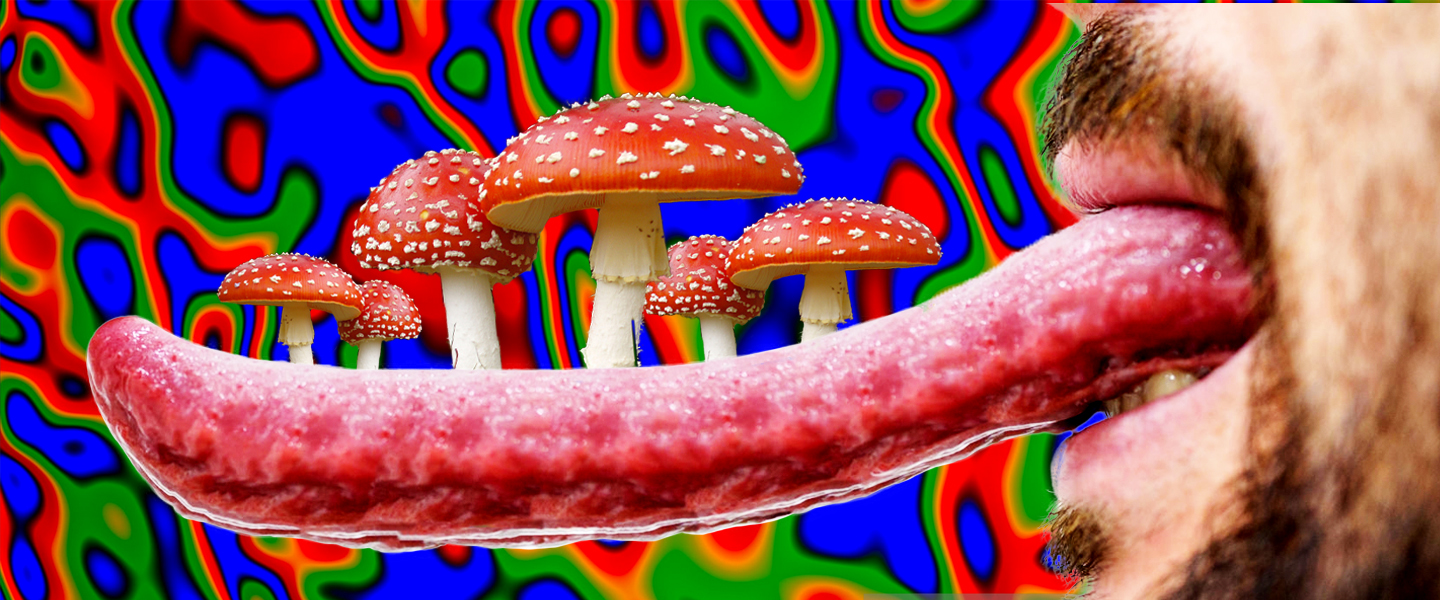

In [10]:
img=load_image(test_img)
img

In [11]:
img.shape

(600, 1440)

We then take a look at an edible mushroom.

In [12]:
test_img=(DATA/'edible').ls()[5]
test_img

Path('../dat255/mushrooms/edible/Image_30.jpg')

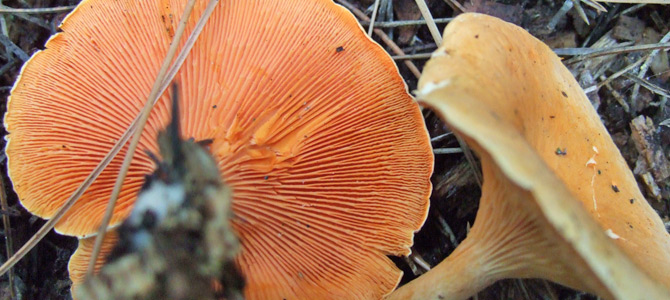

In [13]:
img=load_image(test_img)
img

In [14]:
img.shape

(300, 670)

## From Data to DataLoaders

In [15]:
mushroom_dl = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls=mushroom_dl.dataloaders(DATA)

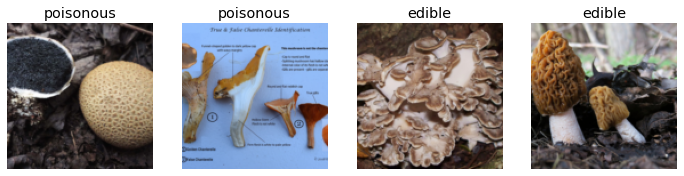

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

Replace 'Resize' with 'RandomResizeCrop'. We do this to train the neural network with examples of images where the objects are in slightly different places and slightly different sizes. 

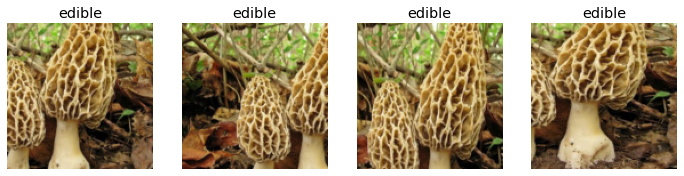

In [18]:
mushroom_dl = mushroom_dl.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = mushroom_dl.dataloaders(DATA)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Data augmentation: creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data.

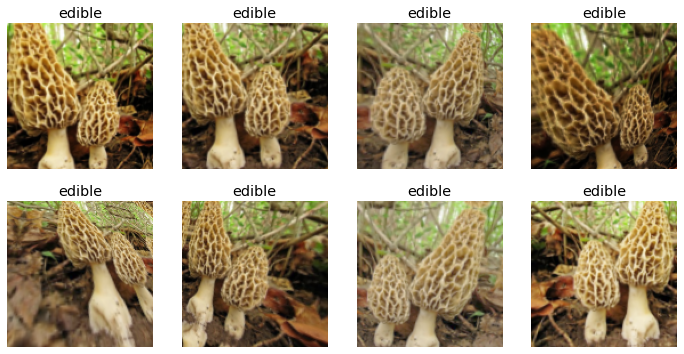

In [19]:
mushroom_dl = mushroom_dl.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = mushroom_dl.dataloaders(DATA)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Train the model

In [20]:
mushroom_dl = mushroom_dl.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mushroom_dl.dataloaders(DATA)

We create our learner and fine-tune it in the usual way:

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.270961,2.830584,0.516667,01:30


epoch,train_loss,valid_loss,error_rate,time


We create a confusion matrix:

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

From the confusion matrix we see that our model correctly classifies 27 edible mushroom and wrongly classifies 3 mushrooms as edible (which is actually poisonous). The model correctly classifies 28 poisonous mushrooms, but wrongly classifies 2 mushrooms as poisonous. 

In [ ]:
interp.plot_top_losses(5, nrows=1)

## Data cleaning

The 'ImageClassifierCleaner' lets you choose a category and the training versus validation set and view the highest-loss images (in order), along with the menus to allow images to be selected for removal or relabeling.

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

Deleting the images set to delete. 

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

## Creating a Notebook App from the Model

Saving both the architecture and the trained parameters with 'export'.

In [ ]:
learn.export()

In [ ]:
DATA = Path()
DATA.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(DATA/'export.pkl')

Create a file upload widget.

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

We can now get our predictions, and use 'Label' to display them.

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

A button to do the classification:

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Click event handler:

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Put them in a vertical box:

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

## Turning the Notebook into a Real App

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila